# Lab 2 Presentation 1

In [1]:
import ugradio
import numpy as np

import ugradio.pico as pico
import ugradio.dft as dft
import ugradio.doppler as doppler
import ugradio.nch as nch
import ugradio.timing as timing

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

import astropy
import unittest

## Jen : Gather Data

In [2]:
#cold_data_1 = np.load('../Data/big_horn_data_1000.npy.zip')
#cal_data_1 = np.load('../Data/big_horn_data_1000.npz.zip')
cold_data_2 = np.load('../Data/50mV cold data.npz')
cal_data_2 = np.load('../Data/50mV data with rain.npz')

## Combine Real and Complex Signal Components

In [3]:
#cold_data = cold_data_1['big_horn_data_1000'][0] - (cold_data_1["big_horn_data_1000"][1]*5/4*1j)
#cal_data = cal_data_1['big_horn_data_1000'][0] - (cal_data_1["big_horn_data_1000"][1]*5/4*1j)

cold_data = cold_data_2['arr_0'][0] - (cold_data_2["arr_0"][1]*5/4*1j) #SKY
cal_data = cal_data_2['arr_0'][0] - (cal_data_2["arr_0"][1]*5/4*1j) #RAIN 

#cold_data = galactic_data[0] - (galactic_data[1]*5/4*1j)

## Resize Blocks

In [4]:
# resize blocks
cold_data.shape = (-1, 2000)
cal_data.shape = (-1, 2000)

In [5]:
cal_data.shape

(800, 2000)

In [6]:
cold_data.shape

(8000, 2000)

## Plot Raw Horn Data

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


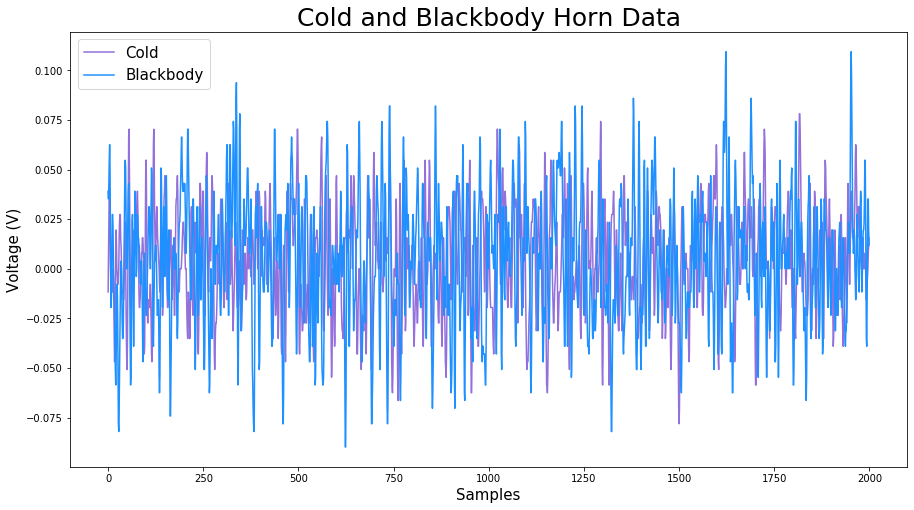

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(cold_data[0]/2**16, "mediumpurple", label="Cold")
plt.plot(cal_data[0]/2**16, "dodgerblue", label="Blackbody")
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Voltage (V)", fontsize=15)
plt.title("Cold and Blackbody Horn Data", fontsize=25)
plt.legend(fontsize=15)

## Olivia : Calculate Average Power Spectra of s_cold 

In [8]:
# COLD DATA, SKY DATA, S_OFF BECAUSE WE DID NOT OBSERVE HYDROGEN IN THIS CAPTURE
freq = np.fft.fftfreq(cold_data.shape[1], 1/62.5e6)
freq = np.fft.fftshift(freq)/1e6

blocks = 8000
avg_power_array = []
for n in range (0, blocks):
    data_new = cold_data[n]
    ft = np.fft.fft(data_new)
    ft = np.fft.fftshift(ft)
    power = abs(ft)**2
    avg_power_array.append(power)
    
avg_power_array = np.mean(avg_power_array, axis = 0)
s_cold = avg_power_array

## Plot Average Power Spectra of s_cold

No handles with labels found to put in legend.


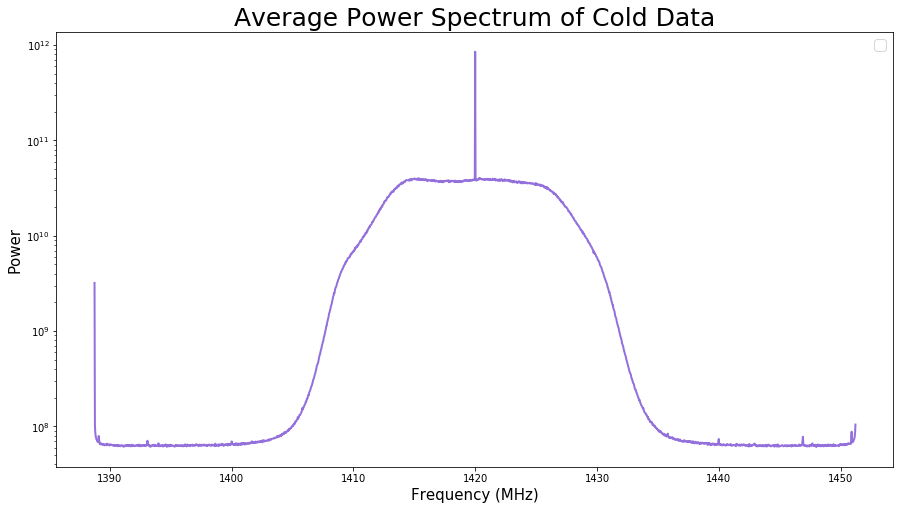

In [9]:
plt.figure(figsize=(15,8))
plt.plot(freq + 1230 + 190, avg_power_array, "mediumpurple", linewidth=2)
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Average Power Spectrum of Cold Data", fontsize=25)
plt.legend(fontsize=15)

#plt.xlim(-2, 2)
#plt.vlines(1420.4058, ymin=10e8, ymax=10e11, linewidth=.5)

## Calculate Average Power Spectra of s_cal

In [10]:
# CAL DATA, RAIN DATA, WHICH IS S_ON BECAUSE WE DO SEE THE HYDROGEN LINE
cal_freq = np.fft.fftfreq(cal_data.shape[1], 1/62.5e6)
cal_freq = np.fft.fftshift(cal_freq)/1e6

blocks = 800
avg_rain_power_array = []
for n in range (0, blocks):
    data_new = cal_data[n]
    ft = np.fft.fft(data_new)
    ft = np.fft.fftshift(ft)
    power = abs(ft)**2
    avg_rain_power_array.append(power)
    
avg_rain_power_array = np.mean(avg_rain_power_array, axis=0)
s_cal = avg_rain_power_array

## Plot Average Power Spectra of s_cal

No handles with labels found to put in legend.


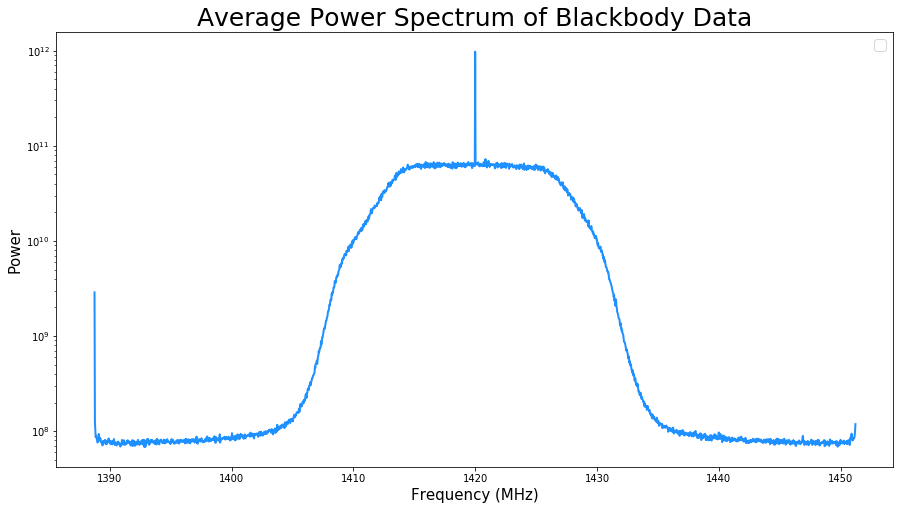

In [11]:
#%matplotlib notebook
plt.figure(figsize=(15,8))
plt.plot(cal_freq + 1230 + 190, avg_rain_power_array, "dodgerblue", linewidth=2)
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Average Power Spectrum of Blackbody Data", fontsize=25)
plt.legend(fontsize=15)
#plt.xlim(-1, 1)
#plt.vlines(1420.4058, ymin=10e8, ymax=10e11, linewidth=.5)

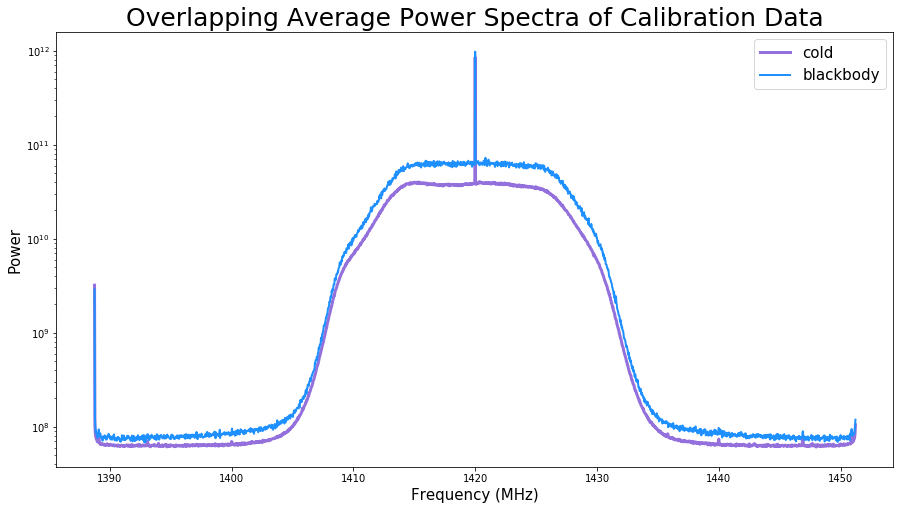

In [12]:
#%matplotlib notebook

plt.figure(figsize=(15,8))
plt.plot(freq + 1230 + 190, avg_power_array, "mediumpurple", linewidth=3, label="cold")
plt.plot(cal_freq + 1230 + 190, avg_rain_power_array, "dodgerblue", linewidth=2, label="blackbody")
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Overlapping Average Power Spectra of Calibration Data", fontsize=25)
plt.legend(fontsize=15)
#plt.xlim(-1, 1)
#plt.vlines(1420.4058, ymin=10e8, ymax=10e11, linewidth=.5)

# Madeline : Estimate Optimal Time Range for Galactic Plane Observation

In [13]:
from astropy.coordinates import EarthLocation, SkyCoord

In [14]:
# assumes we are at campbell
ugradio.timing.lst()

0.40397567730035067

In [15]:
# ideal HI viewing time is at LST = 19 - 6
galactic_data_source = np.load('../Data/Galaxy Data 1000.npz')

### Combine complex and real components and resize blocks

In [16]:
galactic_data = galactic_data_source['arr_0'][0] - (galactic_data_source["arr_0"][1]*5/4*1j)

# resize blocks
galactic_data.shape = (-1, 2000)
galactic_data.shape

(8000, 2000)

### Calculate average power spectrum 

In [17]:
# GALACTIC DATA, S_ON BECAUSE WE ARE OBSERVING HYDROGEN LINE
galactic_freq = np.fft.fftfreq(galactic_data.shape[1], 1/62.5e6)
galactic_freq = np.fft.fftshift(galactic_freq)/1e6

blocks = 8000
avg_galactic_power_array = []
for n in range (0, blocks):
    data_new = galactic_data[n]
    ft = np.fft.fft(data_new)
    ft = np.fft.fftshift(ft)
    power = abs(ft)**2
    avg_galactic_power_array.append(power)
    
avg_galactic_power_array = np.mean(avg_galactic_power_array, axis = 0)
s_on = avg_galactic_power_array

### Plot average power spectrum

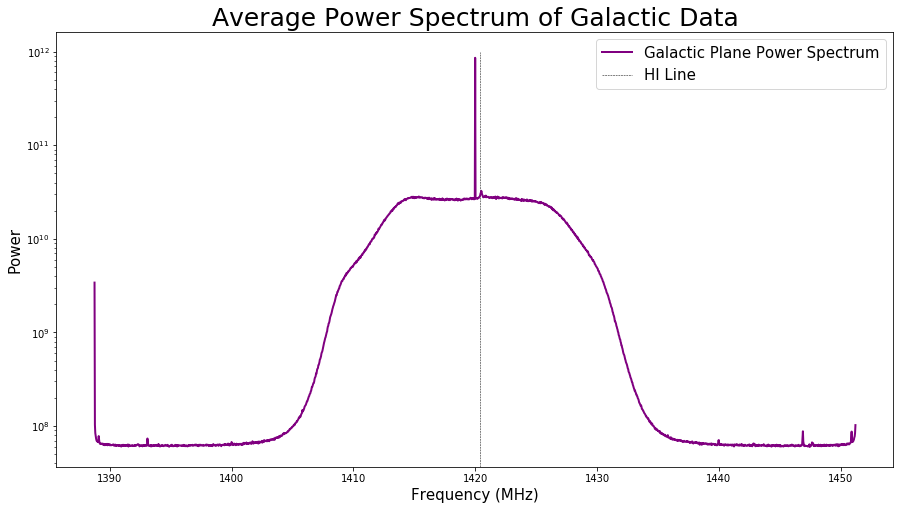

In [18]:
#%matplotlib notebook
plt.figure(figsize=(15,8))
plt.plot(freq + 1230 + 190, avg_galactic_power_array, "purple", linewidth=2, label="Galactic Plane Power Spectrum")
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Average Power Spectrum of Galactic Data", fontsize=25)

#plt.xlim(-2, 2)
plt.vlines(1420.4058, ymin=0, ymax=10e11, linestyle="dashed", linewidth=.5, label="HI Line")

plt.legend(fontsize=15)

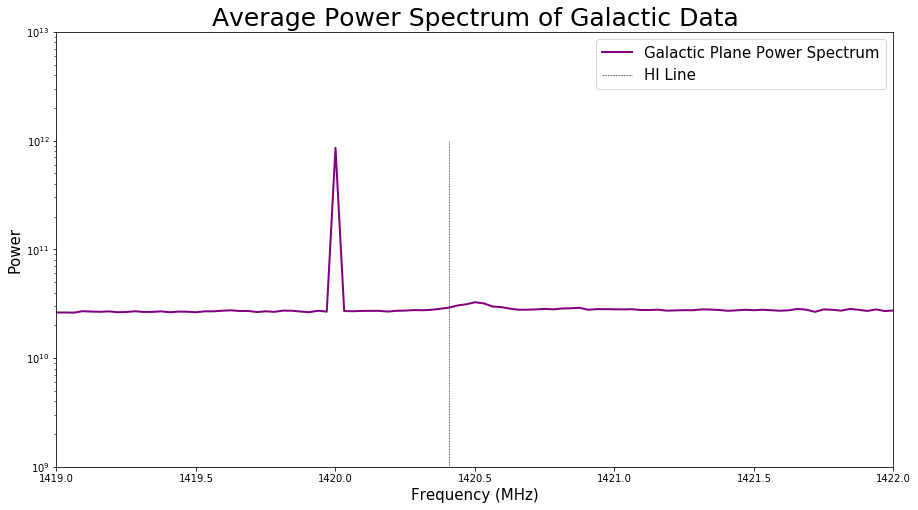

In [19]:
#%matplotlib notebook
plt.figure(figsize=(15,8))
plt.plot(freq + 1230 + 190, avg_galactic_power_array, "purple", linewidth=2, label="Galactic Plane Power Spectrum")
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Average Power Spectrum of Galactic Data", fontsize=25)

plt.xlim(1419, 1422)
plt.ylim(10e8, 10e12)
plt.vlines(1420.4058, ymin=0, ymax=10e11, linestyle="dashed", linewidth=.5, label="HI Line")
plt.legend(fontsize=15)

# Mel : Calculate Gain and T_line

### find T_sys

In [20]:
# temperature
T_rx = 300 #kelvin
T_sky = 10 #between 10-100K
T_sys = T_rx - T_sky
T_sys

290

### filter out spikes 

In [21]:
# shape
g_freq = freq + 1230 + 190
s_line = s_on / s_cold #s_off=s_cold #GALACTIC POWER SPECTRA / SKY POWER SPECTRA #probably wrong. ratio of on observation (hydrogen there), over off observation (no H)


filtered_s_cold = np.array([s for s in s_cold if not (g_freq[list(s_cold).index(s)]<1390 or g_freq[list(s_cold).index(s)]>1451 or (g_freq[list(s_cold).index(s)]< 1421 and g_freq[list(s_cold).index(s)]>1419))])
filtered_s_cal = np.array([s for s in s_cal if not (g_freq[list(s_cal).index(s)]<1390 or g_freq[list(s_cal).index(s)]>1451 or (g_freq[list(s_cal).index(s)]< 1421 and g_freq[list(s_cal).index(s)]>1419))])
print(len(filtered_s_cold), len(filtered_s_cal))

1890 1890


## Plot Filtered S_cold and S_cal

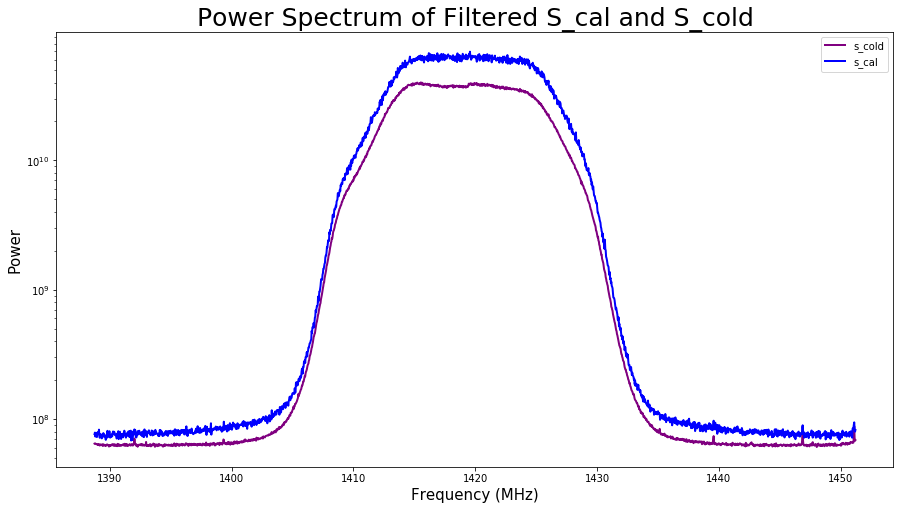

In [22]:
filtered_freq = np.fft.fftfreq(filtered_s_cold.shape[0], 1/62.5e6)
filtered_freq = np.fft.fftshift(filtered_freq)/1e6

#%matplotlib notebook
plt.figure(figsize=(15,8))
plt.plot(filtered_freq + 1230 + 190, filtered_s_cold, "purple", linewidth=2, label="s_cold")
plt.plot(filtered_freq + 1230 + 190, filtered_s_cal, "blue", linewidth=2, label="s_cal")
#plt.plot(filtered_freq + 1230 + 190, filtered_s_on, "blue", linewidth=2, label="s_off")
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Power Spectrum of Filtered S_cal and S_cold", fontsize=25)
plt.legend()

#plt.xlim(-2, 2)
#plt.vlines(1420.4058, ymin=0, ymax=10e11, linestyle="dashed", linewidth=.5)

### calculate G and T_line

In [23]:
G = T_sys/(np.sum(filtered_s_cal - filtered_s_cold)) * np.sum(filtered_s_cold)
T_line = s_line * G #power spectra in temperature units 

In [24]:
print("Gain G = " + str(G))

Gain G = 465.9025664952673


<IPython.core.display.Javascript object>


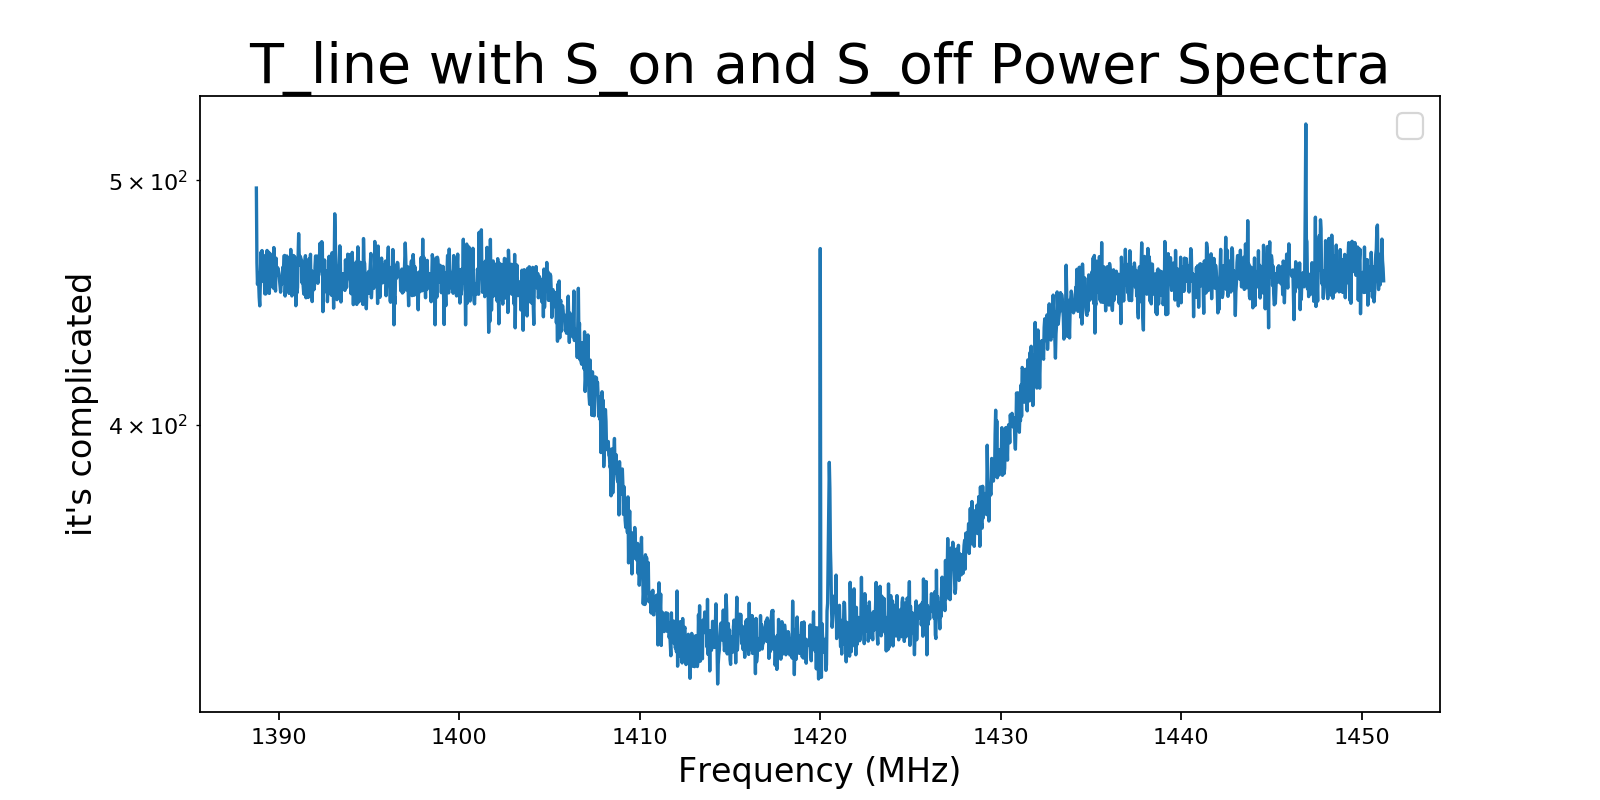

No handles with labels found to put in legend.


In [56]:
plt.figure(figsize=(10,5))
#plt.plot(g_freq, s_on, "r", label="s_on")
#plt.plot(g_freq, s_cold, label="s_off")
plt.plot(g_freq, T_line)
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("it's complicated", fontsize=15)
plt.title("T_line with S_on and S_off Power Spectra", fontsize=25)
plt.legend(fontsize=15)
plt.yscale("log")

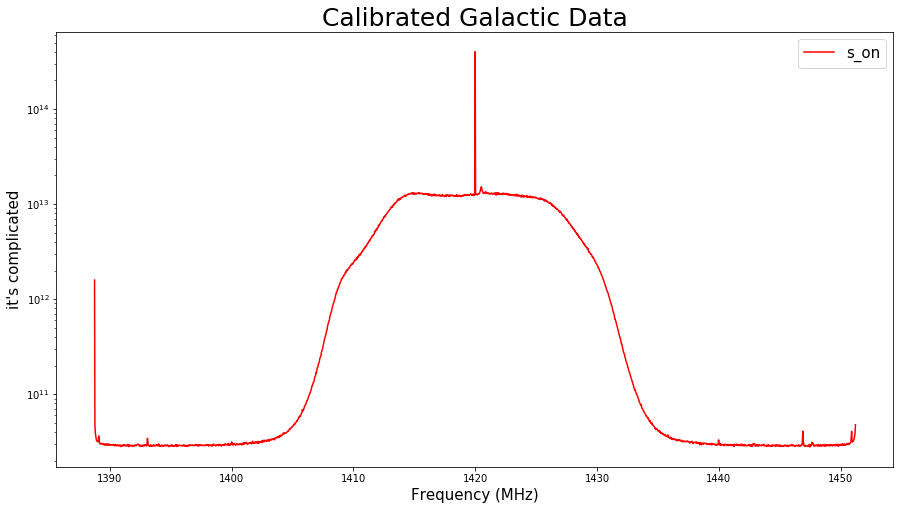

In [26]:
plt.figure(figsize=(15,8))
plt.plot(g_freq, G * s_on, "r", label="s_on")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("it's complicated", fontsize=15)
plt.title("Calibrated Galactic Data", fontsize=25)
plt.legend(fontsize=15)
plt.yscale("log")

# $v/c = - \Delta \nu / \nu_0$

In [27]:
calibrated_data = G * s_on
list1 = calibrated_data.tolist()
list1.remove(max(list1))
nu_1 = g_freq[list1.index(max(list1))+1]

In [28]:
nu_1

1420.5

In [29]:
nu_0 = 1420.4
delta_nu = nu_1 - nu_0
c = 2.99792458 * 10**8

In [30]:
delta_nu

0.09999999999990905

In [31]:
doppler_velocity = - delta_nu/nu_0*c/1000

In [32]:
doppler_velocity

-21.10619952124242

In [33]:
#doppler_v_axis = [-(s-1420.4)/1420.4*c for s in g_freq]
doppler_v_axis = -(g_freq-1420.4)/1420.4*c/1000

<IPython.core.display.Javascript object>


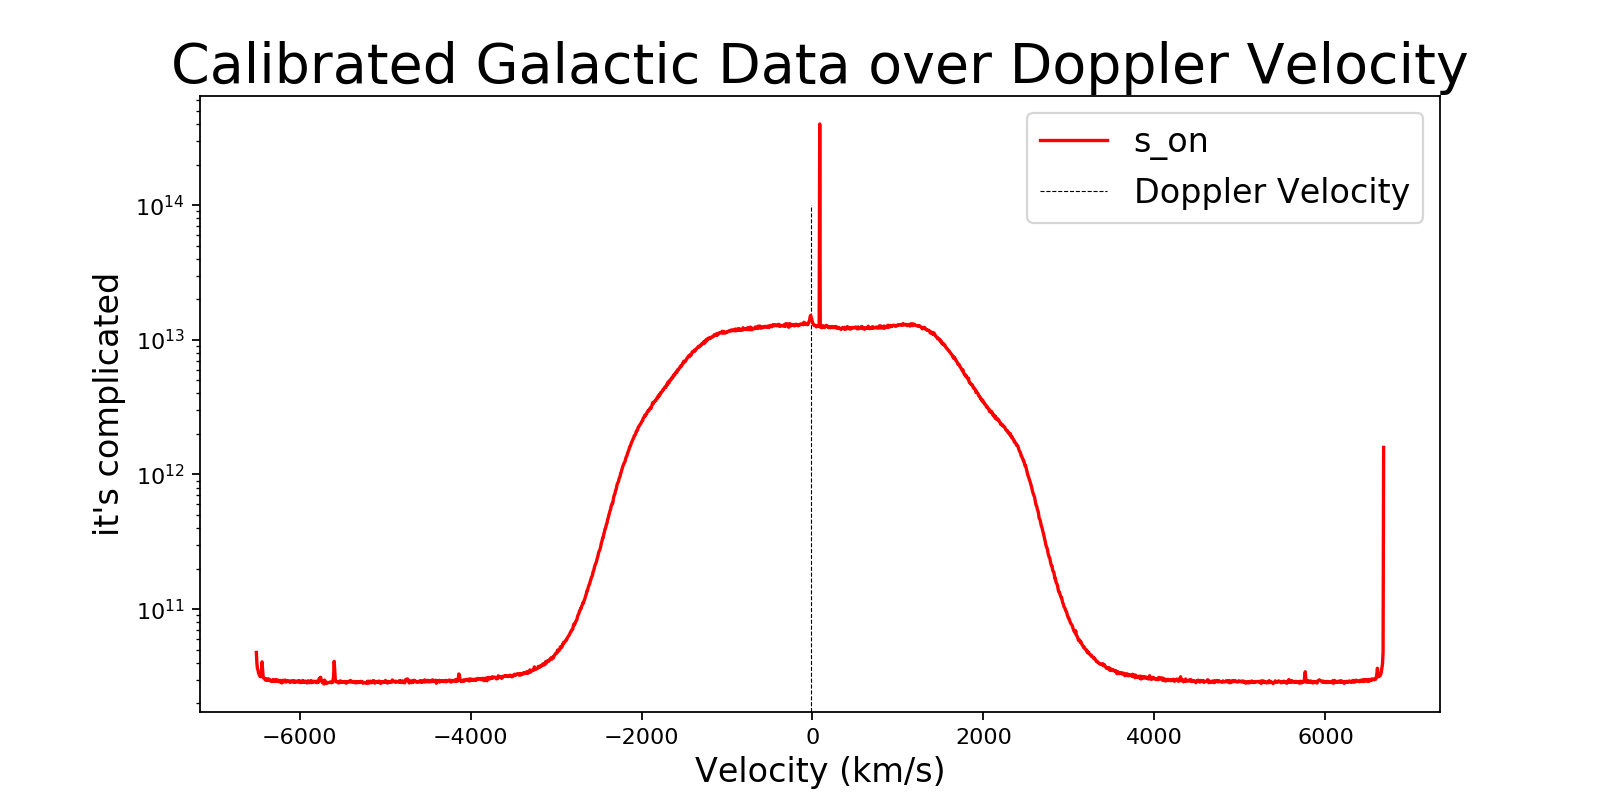

In [34]:
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.plot(doppler_v_axis, G * s_on, "r", label="s_on")
plt.xlabel("Velocity (km/s)", fontsize=15)
plt.ylabel("it's complicated", fontsize=15)
plt.title("Calibrated Galactic Data over Doppler Velocity", fontsize=25)
plt.yscale("log")
plt.vlines(doppler_velocity, ymin=0, ymax=10e13, linestyle="dashed", linewidth=.5, label="Doppler Velocity")
plt.legend(fontsize=15)

## Calculate Doppler Correction

In [35]:
dec = nch.lat
jd = ugradio.timing.julian_date(1613674800)
ra = ugradio.timing.lst(jd)

In [51]:
v = ugradio.doppler.get_projected_velocity(ra, dec, jd)

In [52]:
v_float = v.to_value('km/s')
v_float

-19.943700995094517

In [38]:
dist_to_sun = 1.5e8 #km
orbit_dist = 2*np.pi*dist_to_sun
orbit_v = orbit_dist/(np.pi*1e7) #60*60*24*365
galactic_orbit_v = 220 #km/s
orbit_v # maximum error contribution from orbital velocity

29.999999999999996

<IPython.core.display.Javascript object>


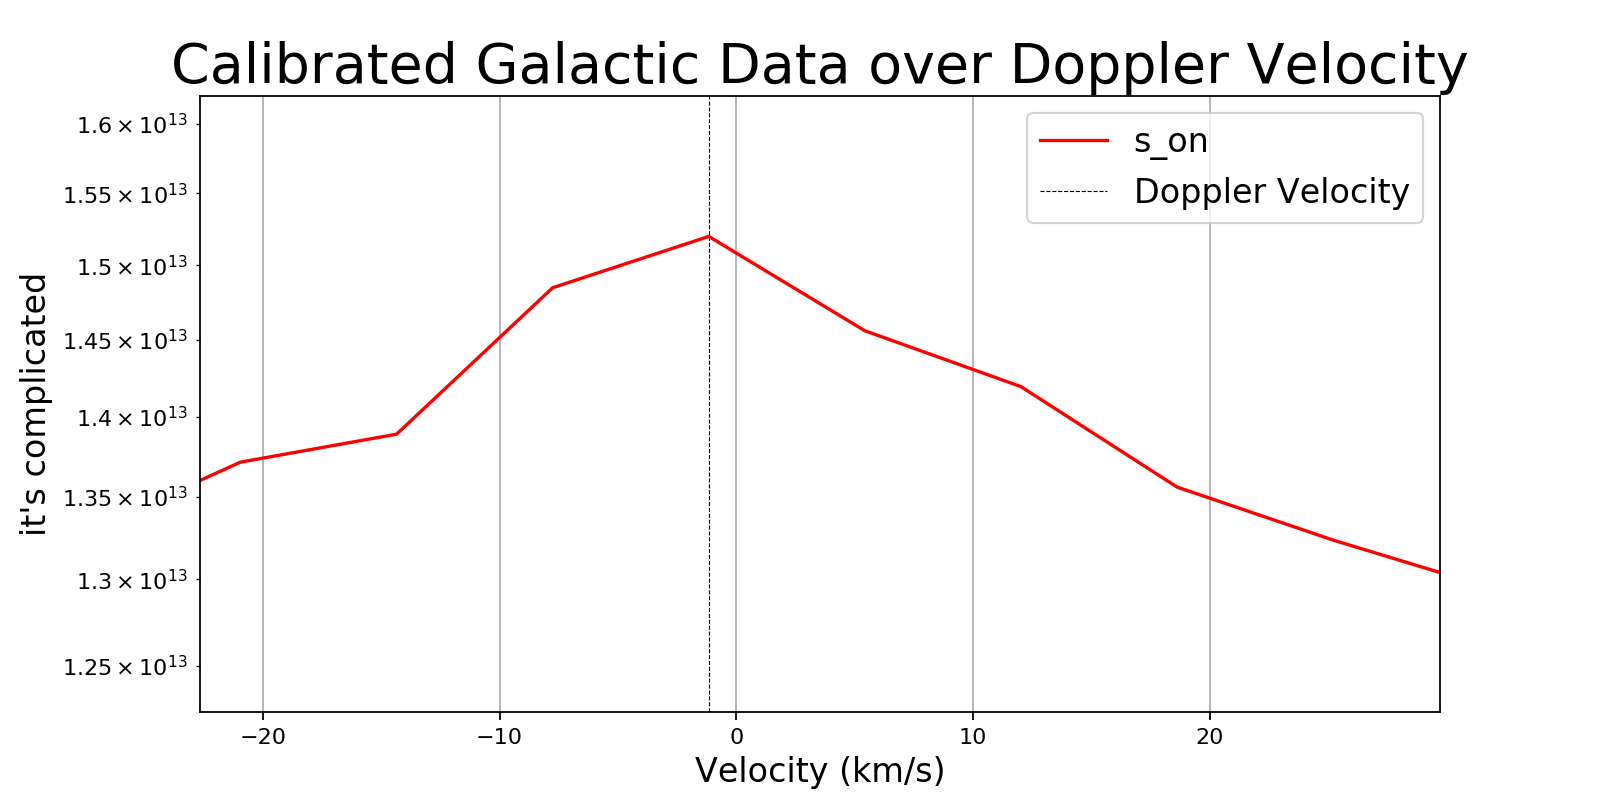

In [54]:
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.plot(doppler_v_axis - v_float, G * s_on, "r", label="s_on")
plt.xlabel("Velocity (km/s)", fontsize=15)
plt.ylabel("it's complicated", fontsize=15)
plt.title("Calibrated Galactic Data over Doppler Velocity", fontsize=25)
plt.yscale("log")
plt.vlines(doppler_velocity - v_float, ymin=0, ymax=10e13, linestyle="dashed", linewidth=.5, label="Doppler Velocity")
plt.legend(fontsize=15)